In [1]:
from loadFilteredData import *
#loading all data
origImg = loadAllTopicData('original')
gingham = loadAllTopicData('gingham')
clarendon = loadAllTopicData('clarendon')
juno = loadAllTopicData('juno')
lark = loadAllTopicData('lark')
gotham = loadAllTopicData('gotham')
reyes = loadAllTopicData('reyes')

['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphithe

In [2]:
X, y, Xtest, ytest = createData([origImg, clarendon, gingham, juno, lark, gotham, reyes], .8)

9000
9000
9000
9000
9000
9000
9000


In [3]:
X.shape

(50400, 128, 128, 3)

In [4]:
def threeChannelHistogram(images, bins):
    histograms = []
    for image in images:
        redHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        greenHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        blueHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        #print(np.hstack((redHist, greenHist, blueHist)))
        histograms.append(np.hstack((redHist, greenHist, blueHist)))
        #histograms.append(np.histogram(image, bins=bins, range=(0, 255))[0])
    return np.stack(histograms)
bins = 255
categories = 7
Xhist = threeChannelHistogram(X, bins)

In [5]:
from preprocessing import *
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=bins * 3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(categories, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Using TensorFlow backend.


In [6]:
model.fit(Xhist, y, epochs=100, batch_size=128)

Epoch 1/100
50400/50400 [==============================] - 5s 103us/step - loss: 1.7724 - acc: 0.2559
Epoch 2/100
50400/50400 [==============================] - 3s 60us/step - loss: 1.5652 - acc: 0.3705
Epoch 3/100
50400/50400 [==============================] - 3s 59us/step - loss: 1.3912 - acc: 0.4196
Epoch 4/100
50400/50400 [==============================] - 3s 61us/step - loss: 1.3133 - acc: 0.4423
Epoch 5/100
50400/50400 [==============================] - 3s 62us/step - loss: 1.2573 - acc: 0.4662
Epoch 6/100
50400/50400 [==============================] - 3s 63us/step - loss: 1.2285 - acc: 0.4796
Epoch 7/100
50400/50400 [==============================] - 3s 57us/step - loss: 1.1974 - acc: 0.5185
Epoch 8/100
50400/50400 [==============================] - 3s 63us/step - loss: 1.1345 - acc: 0.5682
Epoch 9/100
50400/50400 [==============================] - 3s 59us/step - loss: 1.1034 - acc: 0.5780
Epoch 10/100
50400/50400 [==============================] - 3s 56us/step - loss: 1.0743 - 

50400/50400 [==============================] - 3s 55us/step - loss: 0.6543 - acc: 0.7625
Epoch 82/100
50400/50400 [==============================] - 3s 66us/step - loss: 0.6490 - acc: 0.7649
Epoch 83/100
50400/50400 [==============================] - 4s 70us/step - loss: 0.6539 - acc: 0.7628
Epoch 84/100
50400/50400 [==============================] - 3s 69us/step - loss: 0.6493 - acc: 0.7655
Epoch 85/100
50400/50400 [==============================] - 3s 68us/step - loss: 0.6483 - acc: 0.7657
Epoch 86/100
50400/50400 [==============================] - 3s 69us/step - loss: 0.6437 - acc: 0.7670
Epoch 87/100
50400/50400 [==============================] - 3s 69us/step - loss: 0.6460 - acc: 0.7661
Epoch 88/100
50400/50400 [==============================] - 3s 69us/step - loss: 0.6403 - acc: 0.7674
Epoch 89/100
50400/50400 [==============================] - 3s 69us/step - loss: 0.6474 - acc: 0.7667
Epoch 90/100
50400/50400 [==============================] - 4s 70us/step - loss: 0.6440 - acc: 

In [33]:
def threeChannelHistogram(images, bins):
    histograms = []
    for image in images:
        redHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        greenHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        blueHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        #print(np.hstack((redHist, greenHist, blueHist)))
        histograms.append(np.hstack((redHist, greenHist, blueHist)))
        #histograms.append(np.histogram(image, bins=bins, range=(0, 255))[0])
    return np.stack(histograms)
from sklearn.metrics import precision_recall_fscore_support
#Xhisttest = threeChannelHistogram(Xtest, bins=bins)
predict = model.predict(Xhisttest)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest.argmax(axis=1), predict.argmax(axis=1)))
precision_recall_fscore_support(ytest.argmax(axis=1), predict.argmax(axis=1))

[[1051  241   18  106  238   92   54]
 [ 144 1415    4  133   41   44   19]
 [  14    0 1756    0    0    0   30]
 [ 109  343    6 1044  252   15   31]
 [ 229   52    9  230 1212   28   40]
 [  51   15    1    8   22 1703    0]
 [  34    2   46   10   24    0 1684]]
0.7829365079365079


(array([0.6439951 , 0.68423598, 0.95434783, 0.68190725, 0.67747345,
        0.90488842, 0.90635091]),
 array([0.58388889, 0.78611111, 0.97555556, 0.58      , 0.67333333,
        0.94611111, 0.93555556]),
 array([0.61247086, 0.73164426, 0.96483516, 0.62683879, 0.67539705,
        0.92504074, 0.92072171]),
 array([1800, 1800, 1800, 1800, 1800, 1800, 1800], dtype=int64))

In [28]:
from preprocessing import *
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=bins * 3, activation='relu'))
model.add(Dense(32, input_dim=bins * 3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(categories, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xhist, y, epochs=100, batch_size=128)

Epoch 1/100
50400/50400 [==============================] - 3s 56us/step - loss: 2.2428 - acc: 0.1536
Epoch 2/100
50400/50400 [==============================] - 2s 46us/step - loss: 1.9383 - acc: 0.1471
Epoch 3/100
50400/50400 [==============================] - 2s 43us/step - loss: 1.9461 - acc: 0.1416
Epoch 4/100
50400/50400 [==============================] - 3s 50us/step - loss: 1.9470 - acc: 0.1413
Epoch 5/100
50400/50400 [==============================] - 2s 47us/step - loss: 1.9467 - acc: 0.1406
Epoch 6/100
50400/50400 [==============================] - 2s 46us/step - loss: 1.9467 - acc: 0.1415
Epoch 7/100
50400/50400 [==============================] - 2s 45us/step - loss: 1.9467 - acc: 0.1393
Epoch 8/100
50400/50400 [==============================] - 2s 43us/step - loss: 1.9467 - acc: 0.1424
Epoch 9/100
50400/50400 [==============================] - 2s 42us/step - loss: 1.9467 - acc: 0.1384
Epoch 10/100
50400/50400 [==============================] - ETA: 0s - loss: 1.9467 - acc: 0

KeyboardInterrupt: 

[[1051  241   18  106  238   92   54]
 [ 144 1415    4  133   41   44   19]
 [  14    0 1756    0    0    0   30]
 [ 109  343    6 1044  252   15   31]
 [ 229   52    9  230 1212   28   40]
 [  51   15    1    8   22 1703    0]
 [  34    2   46   10   24    0 1684]]


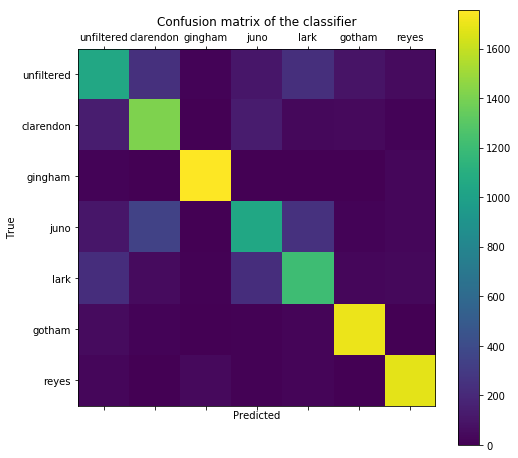

In [37]:
from sklearn.metrics import confusion_matrix
labels = ['unfiltered', 'clarendon', 'gingham', 'juno', 'lark', 'gotham', 'reyes']
cm = confusion_matrix(ytest.argmax(axis=1), predict.argmax(axis=1))
print(cm)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [7]:
from keras.models import load_model
model.save('NNFilterClassifier.h5')